# <font color = tomato>EDA - Analysis

## <font color = grey> Admin

In [5]:
import pandas as pd
import os
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /root


---

#### <font color = grey> Load Data and Basic Information

In [7]:
import pandas as pd

# Define the file path
# parsed_file_path = '/home/sagemaker-user/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'

# Load the data into a DataFrame
df = pd.read_csv(parsed_file_path, sep=';')

# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

# Display the first few lines of the DataFrame
print("\nFirst few lines:")
df.head(10)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   event_type  int64  
 2   seq_id      object 
 3   time        float64
 4   label       object 
 5   eventlabel  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 217.3+ MB
None

First few lines:


,id,event_type,seq_id,time,label,eventlabel
0,1,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
1,2,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
2,3,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
3,4,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
4,5,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
5,6,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
6,7,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
7,8,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
8,9,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
9,10,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal


___
# <font color = teal> Run Analysis Script

In [8]:
!python3 /root/07.Scripts/20240601_analyze_v1.00.py \
--data_dir /root/11.Data/01.BGL/04.Sampled_Parsed_CFDR \
--show_samples 3

Load parsed sequences ...
Parsed lines total: 4747963
Parsed lines normal: 1460631 (30.8%)
Parsed lines anomalous: 3287332 (69.2%)
Event types total: 394
Event types normal: 130 (33.0%)
Event types anomalous: 338 (85.8%)
Sequences total: 69252
Sequences normal: 37823 (54.6%)
Sequences anomalous: 31429 (45.4%)
Unique sequences: 27571 (39.8%)
Unique sequences normal: 8874 (32.2%)
Unique sequences anomalous: 18697 (67.8%)
Sequences labeled normal that also occur as anomalous: 0 (0.0%), 0 unique
Sequences labeled anomalous that also occur as normal: 0 (0.0%), 0 unique
Common normal sequences: 
5227: ('6', '6', '173', '173', '12', '22', '12', '22')
3835: ('6', '173', '6', '6', '12', '22', '12', '22')
3438: ('6', '6', '173', '173', '9', '12', '22', '12', '22')
Common anomalous sequences: 
1226: ('6', '6', '173', '173', '324', '140', '12', '22', '12', '22')
787: ('6', '173', '173', '173', '173', '173', '173', '173', '173', '384', '6', '173', '173', '173', '173', '173', '173', '173', '173', '3

___
### <font color = orange> Explanation | Script

> The script is designed to perform exploratory data analysis (EDA) on log data to understand the characteristics of normal and anomalous sequences. It processes log files to extract sequences, counts unique sequences and event types, calculates the Lempel-Ziv complexity, performs compression analysis, and computes the entropy of n-grams. Here's a high-level breakdown:

>> Argument Parsing: The script uses argparse to handle command-line arguments for specifying the data directory and the number of sample sequences to display.

>> Data Loading: It reads three CSV files containing training, normal test, and abnormal test sequences.

>> Sequence and Label Extraction: Sequences are extracted and stored in a dictionary, and labels are assigned (0 for normal, 1 for anomalous).

>> Statistics Calculation: Various statistics are calculated, such as the number of lines and unique sequences, the distribution of event types, and the occurrence of normal sequences within anomalous sequences and vice versa.

>> Event Prediction Analysis: The script analyzes the number of distinct events following any given event in normal and all sequences.

>> Lempel-Ziv Complexity: It calculates the Lempel-Ziv complexity, a measure of the complexity of the sequences.

>> Compression Analysis: The script performs Lempel-Ziv-Welsh compression to analyze the compression ratio of the sequences.

>> Entropy Calculation: The entropy of n-grams (subsequences of length n) is calculated to understand the information content in the sequences.

___
### <font color = orange> Explanation | Result

> Parsed lines total: 4747963

>> Total number of lines parsed from the input files.

> Parsed lines normal: 1460631 (30.8%)

>> Number and percentage of normal lines parsed.

> Parsed lines anomalous: 3287332 (69.2%)

>> Number and percentage of anomalous lines parsed.

> Event types total: 394

>> Total number of unique event types found across all sequences.

> Event types normal: 130 (33.0%)

>> Number and percentage of unique event types found in normal sequences.

> Event types anomalous: 338 (85.8%)

>> Number and percentage of unique event types found in anomalous sequences.

> Sequences total: 69252

>> Total number of sequences parsed.

> Sequences normal: 37823 (54.6%)

>> Number and percentage of normal sequences.

> Sequences anomalous: 31429 (45.4%)

>> Number and percentage of anomalous sequences.

> Unique sequences: 27571 (39.8%)

>> Total number and percentage of unique sequences.

> Unique sequences normal: 8874 (32.2%)

>> Number and percentage of unique normal sequences.

> Unique sequences anomalous: 18697 (67.8%)

>> Number and percentage of unique anomalous sequences.

> Sequences labeled normal that also occur as anomalous: 0 (0.0%), 0 unique

>> Number and percentage of sequences labeled normal that also appear as anomalous, and the number of unique such sequences.

> Sequences labeled anomalous that also occur as normal: 0 (0.0%), 0 unique

>> Number and percentage of sequences labeled anomalous that also appear as normal, and the number of unique such sequences.

> Common normal sequences:

>> Lists the most common normal sequences and their counts.

>> 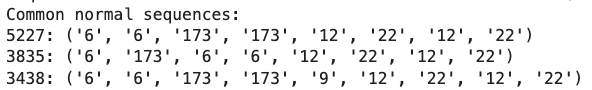

> Common anomalous sequences:

>> Lists the most common anomalous sequences and their counts.

>> 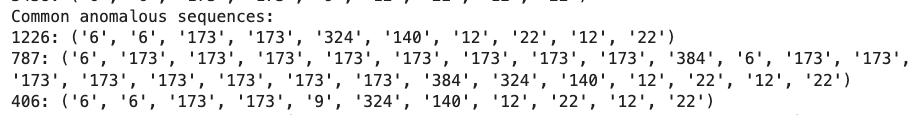

> Unique count vectors: 15579 (56.5% of unique sequences or 22.5% of all sequences)

>> Number and percentage of unique count vectors, representing unique sequences in terms of event frequency.

> Unique count vectors normal: 4605 (29.6%)

>> Number and percentage of unique count vectors in normal sequences.

> Unique count vectors anomalous: 10974 (70.4%)

>> Number and percentage of unique count vectors in anomalous sequences.

> Count vectors labeled normal that also occur as anomalous: 0 (0.0%), 0 unique

>> Number and percentage of count vectors labeled normal that also appear as anomalous, and the number of unique such vectors.

> Count vectors labeled anomalous that also occur as normal: 0 (0.0%), 0 unique

>> Number and percentage of count vectors labeled anomalous that also appear as normal, and the number of unique such vectors.

> Common normal count vectors:

>> Lists the most common normal count vectors and their counts.

>> 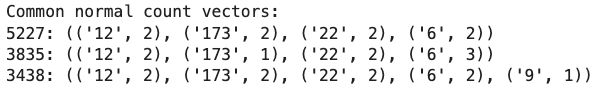

> Common anomalous count vectors:

>> Lists the most common anomalous count vectors and their counts.

>> 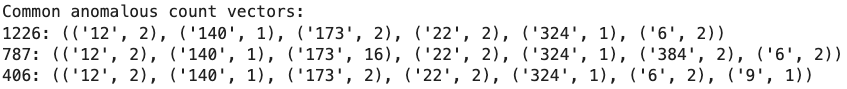

> Number of distinct events following any event in normal sequences: Average: 5.88 Stddev: 6.46

>> Average and standard deviation of the number of distinct events following any event in normal sequences.

> Number of distinct events following any event in all sequences: Average: 5.69 Stddev: 7.47

>> Average and standard deviation of the number of distinct events following any event in all sequences.

> Processed events: 4747963

>> Total number of processed events.

> Lempel-Ziv complexity: 147222

>> Lempel-Ziv complexity of the sequences, indicating the diversity and complexity of the sequences.

> Number of bits to represent all sequences before encoding: 42731667.0

>> Total number of bits required to represent all sequences before compression.

> Compression ratio: 92.07%

>> Compression ratio achieved by Lempel-Ziv-Welsh encoding.

> Entropy of ngrams:

>> Lists the entropy and normalized entropy of n-grams for different values of n (1 to 3), indicating the information content and redundancy in the sequences.

>> 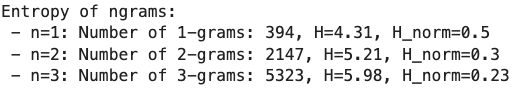

___
# <font color = teal> Review Source Files

### <font color = blue> Training

In [12]:
import pandas as pd

data_dir = '/root/11.Data/01.BGL/04.Sampled_Parsed_CFDR'

# Define file paths
train_file = f'{data_dir}/bgl_train.csv'


# Read and print the first 10 records for each file
# print("First 10 records of bgl_train.csv:")
train_df = pd.read_csv(train_file, header=None)
# train_df.head(10)
train_df.iloc[1:10]

,0,1
1,R23-M0-N5-C:J11-U01,6 168 168 168 168 168 6 6 6 6 6 6 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 12 22 12 22 195
2,R23-M0-NF-C:J06-U11,6 168 168 168 168 6 6 6 6 6 6 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 9 12 22 12 22 195
3,R23-M0-N2-C:J14-U11,6 168 168 168 168 168 168 6 6 6 6 6 6 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195
4,R23-M0-N2-C:J04-U11,6 168 168 168 168 168 6 6 6 6 6 6 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195
5,R22-M0-N5-C:J06-U01,168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 168 168 6 168 168 168 168 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 12 22 12 22 195 195
6,R22-M0-N9-C:J05-U11,168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 168 168 6 168 168 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195
7,R22-M1-N7-C:J05-U01,168 168 168 168 168 168 168 168 168 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 168 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 9 9 9 168 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 9 12 22 12 22 195 195
8,R22-M1-N5-C:J16-U11,168 168 168 168 168 168 168 168 168 168 168 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 168 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 9 168 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 9 12 22 12 22 195 195
9,R22-M1-NE-C:J03-U01,168 168 168 168 168 168 168 168 168 168 168 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 168 168 168 168 168 6 168 168 6 6 6 6 6 6 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 9 9 168 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 9 12 22 12 22 195 195


### <font color = blue> Test Normal

In [10]:
data_dir = '/root/11.Data/01.BGL/04.Sampled_Parsed_CFDR'

# Define file paths
test_normal_file = f'{data_dir}/bgl_test_normal.csv'

# print("\nFirst 10 records of bgl_test_normal.csv:")
test_normal_df = pd.read_csv(test_normal_file, header=None)
# test_normal_df.head(10)
test_normal_df.iloc[1:10]

,0,1
1,R23-M0-NB-C:J12-U01,168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 18 168 6 168 168 168 168 18 6 6 6 6 6 6 168 168 168 168 18 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195 4 355 4 355
2,R23-M0-N9-C:J12-U01,168 6 168 168 168 168 168 6 6 6 6 6 6 168 168 168 18 168 6 168 168 168 168 18 6 6 6 6 6 6 168 168 168 168 18 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195
3,R23-M0-N9-C:J10-U01,168 6 168 168 168 168 168 168 168 168 6 6 6 6 6 6 168 168 168 18 168 6 168 168 168 168 18 6 6 6 6 6 6 168 168 168 168 168 18 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195
4,R23-M0-ND-C:J10-U01,168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 18 6 168 168 168 168 18 6 6 6 6 6 6 168 168 168 168 168 18 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 12 22 12 22 195
5,R23-M0-ND-C:J12-U01,168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 18 6 168 168 168 168 18 6 6 6 6 6 6 168 168 168 168 168 18 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 12 22 12 22 195
6,R23-M0-NF-C:J10-U01,168 6 168 168 168 168 168 168 168 168 6 6 6 6 6 6 168 168 168 18 6 168 168 168 168 18 6 6 6 6 6 6 168 168 168 168 168 18 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195
7,R23-M0-NF-C:J12-U01,168 6 6 6 18 168 168 168 168 6 6 6 6 6 6 168 168 168 18 168 6 168 168 168 168 18 6 6 6 6 6 6 168 168 168 168 168 18 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195
8,R22-M0-NB-C:J12-U01,168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 168 168 6 168 168 168 168 168 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 9 12 22 12 22 195 195
9,R22-M0-NF-C:J10-U01,168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 168 168 6 168 168 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195


### <font color = blue> Test Abnormal

In [11]:
data_dir = '/root/11.Data/01.BGL/04.Sampled_Parsed_CFDR'

# Define file paths
test_abnormal_file = f'{data_dir}/bgl_test_abnormal.csv'

# print("\nFirst 10 records of bgl_test_abnormal.csv:")
test_abnormal_df = pd.read_csv(test_abnormal_file, header=None)
# test_abnormal_df.head(10)
test_abnormal_df.iloc[1:10]

,0,1
1,R20-M1-N5-C:J17-U01,168 6 168 168 168 168 168 168 168 168 168 168 168 98 187 95 147 206 305 98 187 95 147 206 98 187 95 147 206 305 307 308 156 341 99 99 27 309 34 306 304 303 375 217 362 91 149 301 157 204 161 118 117 161 188 96 86 125 168 168 168 6 6 6 6 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 9 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 12 22 12 22 12 22 195 195
2,R20-M1-NF-C:J13-U01,168 6 168 168 15 168 168 168 168 168 168 168 168 168 168 168 98 187 95 147 206 305 98 187 95 147 206 98 187 95 147 206 305 307 308 156 341 99 99 27 309 34 306 304 303 375 217 362 91 149 301 157 204 161 118 117 161 188 96 86 125 168 168 168 168 6 6 6 6 168 168 168 168 168 6 168 168 6 6 6 6 6 6 168 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 9 9 9 9 9 9 168 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 168 324 9 9 9 12 22 12 22 12 22 195 195
3,R20-M1-N9-C:J17-U01,168 6 168 168 168 168 168 168 168 168 98 187 95 147 206 305 98 187 95 147 206 98 187 95 147 206 305 307 308 156 341 99 99 27 309 34 306 304 303 375 217 362 91 149 301 157 204 161 118 117 161 188 96 86 125 168 168 168 168 6 6 6 6 168 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 168 168 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 12 22 12 22 12 22 195 195
4,R24-M1-N6-C:J11-U11,168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 98 187 95 147 206 305 98 187 95 147 206 98 187 95 147 206 305 307 308 156 341 99 99 27 309 34 306 304 303 375 217 362 91 149 301 157 204 161 118 117 161 188 96 86 125 168 168 168 168 168 6 6 6 6 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 9 9 168 168 168 168 168 168 168 168 168 168 168 168 168 12 22 12 22 195
5,R24-M1-ND-C:J16-U01,168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 98 187 95 147 206 305 98 187 95 147 206 98 187 95 147 206 305 307 308 156 341 99 99 27 309 34 306 304 303 375 217 362 91 149 301 157 204 161 118 117 161 188 96 86 125 168 168 168 168 168 168 6 6 6 6 168 168 168 168 168 6 168 168 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 9 168 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 12 22 12 22 195 195
6,R24-M1-NF-C:J12-U01,168 6 168 168 168 168 168 168 168 168 168 168 168 168 98 187 95 147 206 305 98 187 95 147 206 98 187 95 147 206 305 307 308 156 341 99 99 27 309 34 306 304 303 375 217 362 91 149 301 157 204 161 118 117 161 188 96 86 125 168 168 168 6 6 6 6 168 168 168 168 168 6 168 168 6 6 6 6 6 6 168 168 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 9 9 9 9 168 168 9 9 168 168 168 168 168 168 168 168 168 168 168 168 168 9 9 9 12 22 12 22 195 195
7,R20-M0-N3-C:J16-U01,168 6 168 168 168 168 168 168 168 168 168 168 168 98 187 95 147 206 305 98 187 95 147 206 98 187 95 147 206 305 307 308 156 341 99 99 27 309 34 306 304 303 375 217 362 91 149 301 157 204 161 118 117 161 188 96 86 125 168 168 168 168 6 6 6 6 168 168 168 168 168 6 168 168 6 6 6 6 6 6 168 168 168 168 168 6 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 6 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 9 168 168 1

___
# <font color = grey> Backup Screenshots
    
    > python3 20240601_analyze_v1.00.py --data_dir /home/sagemaker-user/11.Data/01.BGL/04.Sampled_Parsed_CFDR --show_samples 3

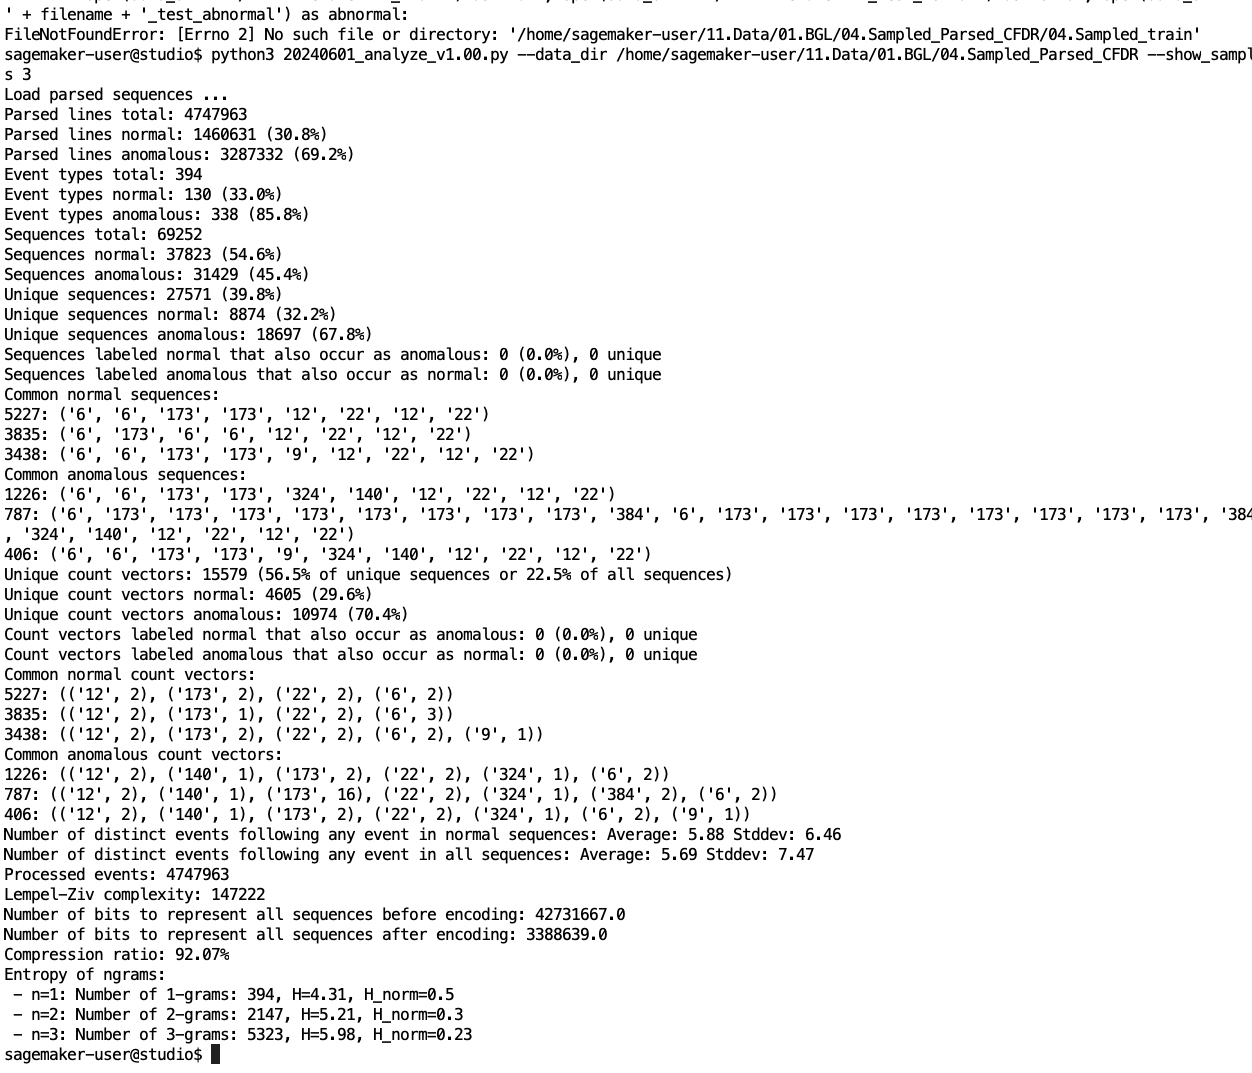

In [ ]:
# Load parsed sequences ...
# Parsed lines total: 4747963
# Parsed lines normal: 1460631 (30.8%)
# Parsed lines anomalous: 3287332 (69.2%)
# Event types total: 394
# Event types normal: 130 (33.0%)
# Event types anomalous: 338 (85.8%)
# Sequences total: 69252
# Sequences normal: 37823 (54.6%)
# Sequences anomalous: 31429 (45.4%)
# Unique sequences: 27571 (39.8%)
# Unique sequences normal: 8874 (32.2%)
# Unique sequences anomalous: 18697 (67.8%)
# Sequences labeled normal that also occur as anomalous: 0 (0.0%), 0 unique
# Sequences labeled anomalous that also occur as normal: 0 (0.0%), 0 unique
# Common normal sequences: 
# 5227: ('6', '6', '173', '173', '12', '22', '12', '22')
# 3835: ('6', '173', '6', '6', '12', '22', '12', '22')
# 3438: ('6', '6', '173', '173', '9', '12', '22', '12', '22')
# Common anomalous sequences: 
# 1226: ('6', '6', '173', '173', '324', '140', '12', '22', '12', '22')
# 787: ('6', '173', '173', '173', '173', '173', '173', '173', '173', '384', '6', '173', '173', '173', '173', '173', '173', '173', '173', '384', '324', '140', '12', '22', '12', '22')
# 406: ('6', '6', '173', '173', '9', '324', '140', '12', '22', '12', '22')
# Unique count vectors: 15579 (56.5% of unique sequences or 22.5% of all sequences)
# Unique count vectors normal: 4605 (29.6%)
# Unique count vectors anomalous: 10974 (70.4%)
# Count vectors labeled normal that also occur as anomalous: 0 (0.0%), 0 unique
# Count vectors labeled anomalous that also occur as normal: 0 (0.0%), 0 unique
# Common normal count vectors:
# 5227: (('12', 2), ('173', 2), ('22', 2), ('6', 2))
# 3835: (('12', 2), ('173', 1), ('22', 2), ('6', 3))
# 3438: (('12', 2), ('173', 2), ('22', 2), ('6', 2), ('9', 1))
# Common anomalous count vectors:
# 1226: (('12', 2), ('140', 1), ('173', 2), ('22', 2), ('324', 1), ('6', 2))
# 787: (('12', 2), ('140', 1), ('173', 16), ('22', 2), ('324', 1), ('384', 2), ('6', 2))
# 406: (('12', 2), ('140', 1), ('173', 2), ('22', 2), ('324', 1), ('6', 2), ('9', 1))
# Number of distinct events following any event in normal sequences: Average: 5.88 Stddev: 6.46
# Number of distinct events following any event in all sequences: Average: 5.69 Stddev: 7.47
# Processed events: 4747963
# Lempel-Ziv complexity: 147222
# Number of bits to represent all sequences before encoding: 42731667.0
# Number of bits to represent all sequences after encoding: 3388639.0
# Compression ratio: 92.07%
# Entropy of ngrams:
#  - n=1: Number of 1-grams: 394, H=4.31, H_norm=0.5
#  - n=2: Number of 2-grams: 2147, H=5.21, H_norm=0.3
#  - n=3: Number of 3-grams: 5323, H=5.98, H_norm=0.23

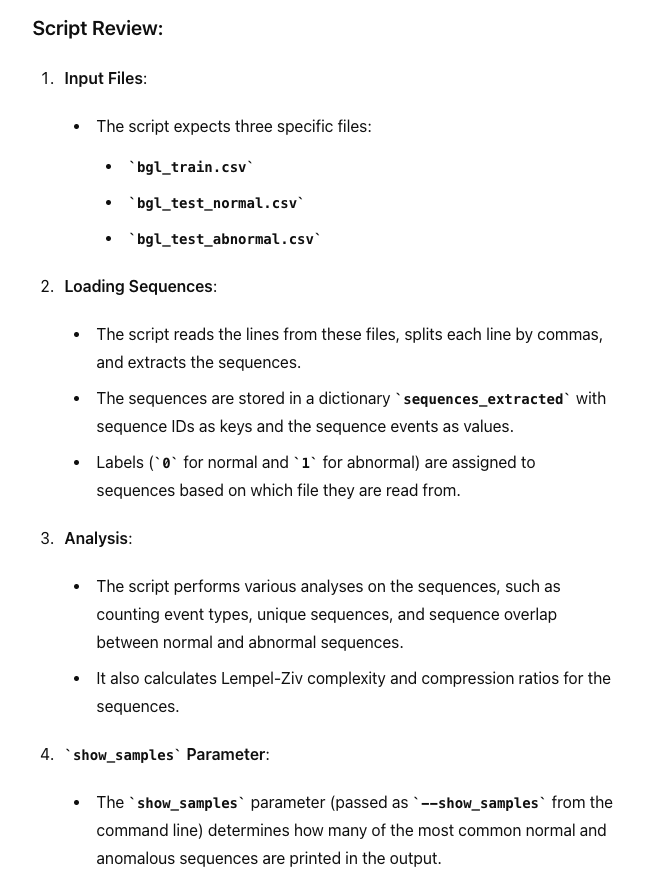

___
# <font color = grey> Prior Info - Reference Only

### Step 1: Summary Statistics

In [ ]:
# # Summary statistics of the DataFrame
# print("\nSummary Statistics:")
# df.describe(include='all')

### Step 2: Checking for Missing Values

In [ ]:
# # Checking for missing values
# print("\nMissing Values:")
# df.isnull().sum()

### Step 3: Distribution of Event Types

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the pastel palette
# sns.set_palette("pastel")

# # Distribution of event types
# plt.figure(figsize=(12, 6))
# sns.countplot(x='event_type', data=df)
# plt.title('Distribution of Event Types')
# plt.xlabel('Event Type')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

#### <font color = orange> 3.1 Top 10 Events Only

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import os

# # Load the data into a DataFrame
# parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
# df = pd.read_csv(parsed_file_path, sep=';')

# # Get the top 10 event types
# top_event_types = df['event_type'].value_counts().head(10).sort_values(ascending=False)

# # Set the pastel palette
# sns.set_palette("pastel")

# # Plot the top 10 event types by count
# plt.figure(figsize=(12, 6))
# bars = sns.barplot(x=top_event_types.index, y=top_event_types.values, palette="pastel", order=top_event_types.index)
# plt.title('Top 10 Event Types by Count')
# plt.xlabel('Event Type')
# plt.ylabel('Count')

# # Add text labels on the bars
# for bar, count in zip(bars.patches, top_event_types.values):
#     height = bar.get_height()
#     bars.text(bar.get_x() + bar.get_width() / 2, height, f'{count:,}', ha='center', va='bottom')

# # Customize the x-axis labels
# bars.set_xticklabels([f'Seq: {et}' for et in top_event_types.index])
# plt.xticks(rotation=90)

# # Format Y axis with comma formatting
# bars.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# plt.show()

# # Load the template data
# base_dir = '/root'
# template_file_path = os.path.join(base_dir, '12.Templates/aecit_BGL_templates.csv')
# with open(template_file_path, 'r') as file:
#     templates = [line.strip() for line in file]

# # Create a table of the top event types and their corresponding templates
# template_table = pd.DataFrame({
#     'Event Type': top_event_types.index,
#     'Template': [templates[et - 1] for et in top_event_types.index]
# })

# # Display the table with text left-aligned
# import IPython.display as display
# display.display(template_table.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))

---

### Step 4: Distribution of Labels

In [ ]:
# # Distribution of labels
# plt.figure(figsize=(8, 4))
# sns.countplot(x='label', data=df)
# plt.title('Distribution of Labels')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.show()

### Step 5: Time Analysis

In [ ]:
# # Convert the time column to datetime
# df['datetime'] = pd.to_datetime(df['time'], unit='s')

# # Plot the number of events over time
# plt.figure(figsize=(14, 7))
# df.set_index('datetime')['id'].resample('D').count().plot()
# plt.title('Number of Events Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Events')
# plt.show()

### Step 6: Event Types Over Time

In [ ]:
# # Plot the number of events for each event type over time
# plt.figure(figsize=(14, 7))
# sns.lineplot(data=df.set_index('datetime').groupby('event_type').resample('D').size().unstack().fillna(0))
# plt.title('Event Types Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Events')
# plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

### Step 7: Correlation Analysis

In [ ]:
# # Correlation matrix
# correlation_matrix = df.corr()

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='pastel', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

### Step 8: Label Distribution Across Event Types

In [ ]:
# # Label distribution across event types
# plt.figure(figsize=(14, 7))
# sns.countplot(x='event_type', hue='label', data=df)
# plt.title('Label Distribution Across Event Types')
# plt.xlabel('Event Type')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import os

# # Load the data into a DataFrame
# parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
# df = pd.read_csv(parsed_file_path, sep=';')

# # Get the top 10 event types
# top_event_types = df['event_type'].value_counts().head(10).sort_values(ascending=False).index

# # Filter the DataFrame to include only the top 10 event types
# df_top_10 = df[df['event_type'].isin(top_event_types)]

# # Set the pastel palette
# sns.set_palette("pastel")

# # Plot the label distribution across the top 10 event types
# plt.figure(figsize=(14, 7))
# bars = sns.countplot(x='event_type', hue='label', data=df_top_10, palette="pastel", order=top_event_types)
# plt.title('Label Distribution Across Top 10 Event Types')
# plt.xlabel('Event Type')
# plt.ylabel('Count')

# # Customize the x-axis labels
# bars.set_xticklabels([f'Seq: {et}' for et in top_event_types])
# plt.xticks(rotation=90)

# # Format Y axis with comma formatting
# bars.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import os

# # Load the data into a DataFrame
# parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
# df = pd.read_csv(parsed_file_path, sep=';')

# # Get the top 10 event types
# top_event_types = df['event_type'].value_counts().head(10).sort_values(ascending=False).index

# # Filter the DataFrame to include only the top 10 event types
# df_top_10 = df[df['event_type'].isin(top_event_types)]

# # Set the pastel palette
# sns.set_palette("pastel")

# # Plot the label distribution across the top 10 event types
# plt.figure(figsize=(14, 7))
# bars = sns.countplot(x='event_type', hue='label', data=df_top_10, palette="pastel", order=top_event_types)
# plt.title('Label Distribution Across Top 10 Event Types')
# plt.xlabel('Event Type')
# plt.ylabel('Count')

# # Customize the x-axis labels
# bars.set_xticklabels([f'Seq: {et}' for et in top_event_types])
# plt.xticks(rotation=90)

# # Format Y axis with comma formatting
# bars.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# plt.show()

# # Load the template data
# base_dir = '/root'
# template_file_path = os.path.join(base_dir, '12.Templates/aecit_BGL_templates.csv')
# with open(template_file_path, 'r') as file:
#     templates = [line.strip() for line in file]

# # Create a table of the top event types and their corresponding templates
# template_table = pd.DataFrame({
#     'Event Type': top_event_types,
#     'Template': [templates[et - 1] for et in top_event_types]
# })

# # Display the table with text left-aligned
# import IPython.display as display
# display.display(template_table.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))


### Step 9: Sequence ID Analysis

In [ ]:
# # Top 10 sequence IDs by event count
# top_seq_ids = df['seq_id'].value_counts().head(10)

# # Plot the top 10 sequence IDs
# plt.figure(figsize=(12, 6))
# sns.barplot(x=top_seq_ids.index, y=top_seq_ids.values, palette='pastel')
# plt.title('Top 10 Sequence IDs by Event Count')
# plt.xlabel('Sequence ID')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()